### 1. Хотим пятерку, а на деле...

Кластеризуйте данный датасет с помощью метода `k-means`. На основе трёх различных __внутренних__ метрик оценки кластеризации, подберите наилучшее количество кластеров $k$.

In [61]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn import metrics
from sklearn.metrics import pairwise_distances
from sklearn.datasets import make_circles
from sklearn.metrics import davies_bouldin_score

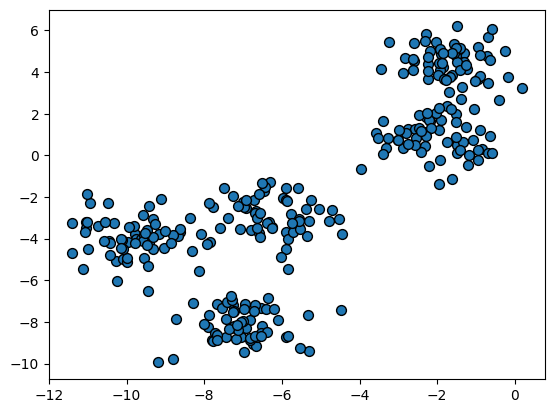

In [62]:


X, y = make_blobs(n_samples=300, centers=5, cluster_std=0.85, random_state=1)
plt.scatter(X[:, 0], X[:, 1], s=50, edgecolor='k')
plt.show()

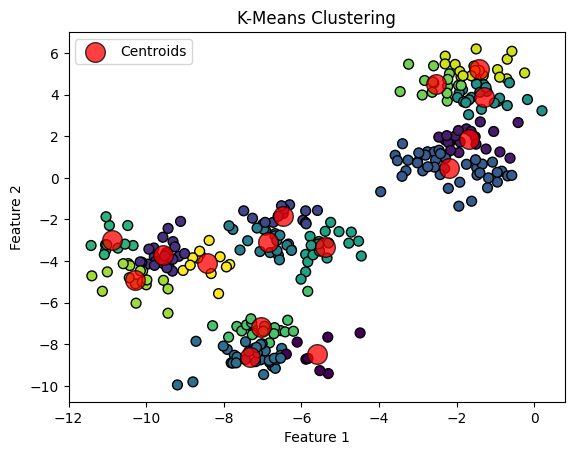

In [66]:
# Инициализация и обучение модели k-means
kmeans = KMeans(n_clusters = 15, n_init = 'auto').fit(X)
y_kmeans = kmeans.predict(X)

# Вывод
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis', edgecolor='k')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75, label='Centroids', edgecolor='k')
plt.legend()
plt.title('K-Means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


Коэффициент силуэта - более высокая оценка - лучше определние кластеров 

Индекс Калински-Харабаса - более высокая оценка - более определенные класторы

Индекс Дэвиса-Болдина - более низка оценка - лучшее разделение моделей

https://scikit-learn.ru/clustering/#clustering-performance-evaluation

In [67]:
for i in range(2,20):
    kmeans = KMeans(n_clusters = i, n_init = 'auto').fit(X)
    labels = kmeans.labels_
    print("\nДля n =", i)
    print("Коэффициент силуэта",metrics.silhouette_score(X, labels))
    print("Индекс Калински-Харабаса ",metrics.calinski_harabasz_score(X, labels))
    print("Индекс Дэвиса-Болдина",metrics.davies_bouldin_score(X, labels))



Для n = 2
Коэффициент силуэта 0.6548880340768699
Индекс Калински-Харабаса  937.6537134482969
Индекс Дэвиса-Болдина 0.49919043886438913

Для n = 3
Коэффициент силуэта 0.608014408720123
Индекс Калински-Харабаса  933.8894745017769
Индекс Дэвиса-Болдина 0.5865838263501706

Для n = 4
Коэффициент силуэта 0.5655809768447311
Индекс Калински-Харабаса  965.195788551536
Индекс Дэвиса-Болдина 0.604066951332427

Для n = 5
Коэффициент силуэта 0.6163373649682037
Индекс Калински-Харабаса  1533.2393672714004
Индекс Дэвиса-Болдина 0.5392636615443337

Для n = 6
Коэффициент силуэта 0.556367839267852
Индекс Калински-Харабаса  1323.5133992544884
Индекс Дэвиса-Болдина 0.7629776718827692

Для n = 7
Коэффициент силуэта 0.49672297323373044
Индекс Калински-Харабаса  1205.4631607171768
Индекс Дэвиса-Болдина 0.8192677831667616

Для n = 8
Коэффициент силуэта 0.469040776040272
Индекс Калински-Харабаса  1115.9949847849086
Индекс Дэвиса-Болдина 0.8840770126638113

Для n = 9
Коэффициент силуэта 0.4208973102383167
Инде


Получаем, что 

По коэффициенту силуэта n = 2

По индексу Калински-Харабаса n = 5

По индексу Дэвиса-Болдина n = 5


Получили, что оценка 2-ая и 3-ая оценка наиболее хорошо описывают кластеризацию данного датасета

### 2. Повторение - мать ученья

Для предыдущего датасета подберите наилучшие гиперпараметры (мера несходства) с использованием агломеративного метода. Постройте дендрограмму для наилучшей модели..

In [43]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import pairwise_distances
from sklearn import metrics
from sklearn.metrics import pairwise_distances
from sklearn.datasets import make_circles
from sklearn.metrics import davies_bouldin_score

https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html

Агломеративная кластеризация. Среднее растояние
Коэффициент силуэта 0.6144222457721612
Индекс Калински-Харабаса  1524.5734593190898
Индекс Дэвиса-Болдина 0.5411455567345259


Агломеративная кластеризация. Блинжний сосед
Коэффициент силуэта 0.3762443977928477
Индекс Калински-Харабаса  470.6173058888025
Индекс Дэвиса-Болдина 0.6943812684305752


Агломеративная кластеризация. Дальний сосед
Коэффициент силуэта 0.5576435626621273
Индекс Калински-Харабаса  1257.1589663584202
Индекс Дэвиса-Болдина 0.5951751696418048


Агломеративная кластеризация. ward
Коэффициент силуэта 0.6127026803856701
Индекс Калински-Харабаса  1517.694205911114
Индекс Дэвиса-Болдина 0.5423962565328755


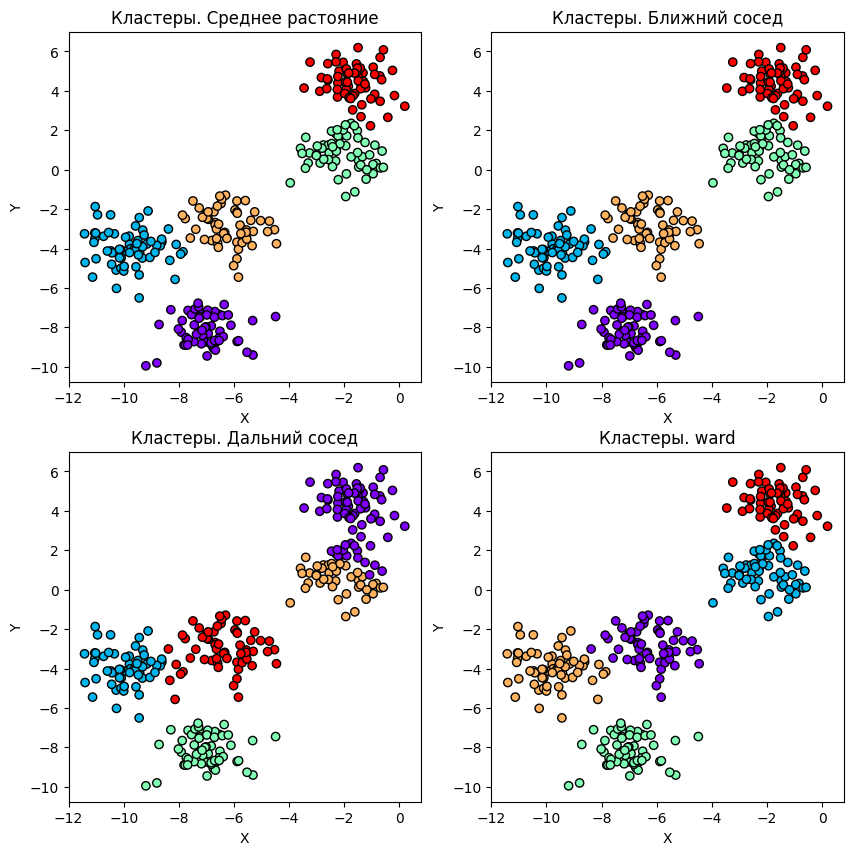

In [53]:
X, y = make_blobs(n_samples=300, centers=5, cluster_std=0.85, random_state=1)

print("Агломеративная кластеризация. Среднее растояние")

agglom_clustering_average = AgglomerativeClustering(n_clusters=5, linkage = 'average') # n_clusters - где обрезать дендрограмму
labels = AgglomerativeClustering(n_clusters=5, linkage = 'average')
clusters_average = agglom_clustering_average.fit_predict(X)

print("Коэффициент силуэта",metrics.silhouette_score(X, agglom_clustering_average.fit(X).labels_))
print("Индекс Калински-Харабаса ",metrics.calinski_harabasz_score(X, agglom_clustering_average.fit(X).labels_))
print("Индекс Дэвиса-Болдина",metrics.davies_bouldin_score(X, agglom_clustering_average.fit(X).labels_))
Z_average = linkage(X, method='average')
print("\n")


print("Агломеративная кластеризация. Блинжний сосед")

agglom_clustering_single = AgglomerativeClustering(n_clusters=5, linkage = 'single') # n_clusters - где обрезать дендрограмму
clusters_single = agglom_clustering_average.fit_predict(X)
print("Коэффициент силуэта",metrics.silhouette_score(X, agglom_clustering_single.fit(X).labels_))
print("Индекс Калински-Харабаса ",metrics.calinski_harabasz_score(X, agglom_clustering_single.fit(X).labels_))
print("Индекс Дэвиса-Болдина",metrics.davies_bouldin_score(X, agglom_clustering_single.fit(X).labels_))
Z_single = linkage(X, method='single')
print("\n")

print("Агломеративная кластеризация. Дальний сосед")

agglom_clustering_complete = AgglomerativeClustering(n_clusters=5, linkage = 'complete') # n_clusters - где обрезать дендрограмму
clusters_complete = agglom_clustering_complete.fit_predict(X)
print("Коэффициент силуэта",metrics.silhouette_score(X, agglom_clustering_complete.fit(X).labels_))
print("Индекс Калински-Харабаса ",metrics.calinski_harabasz_score(X, agglom_clustering_complete.fit(X).labels_))
print("Индекс Дэвиса-Болдина",metrics.davies_bouldin_score(X,agglom_clustering_complete.fit(X).labels_))
Z_complete = linkage(X, method='complete')

print("\n")
print("Агломеративная кластеризация. ward")
agglom_clustering_ward = AgglomerativeClustering(n_clusters=5, linkage = 'ward') # n_clusters - где обрезать дендрограмму
clusters_ward = agglom_clustering_ward.fit_predict(X)
print("Коэффициент силуэта",metrics.silhouette_score(X, agglom_clustering_ward.fit(X).labels_))
print("Индекс Калински-Харабаса ",metrics.calinski_harabasz_score(X, agglom_clustering_ward.fit(X).labels_))
print("Индекс Дэвиса-Болдина",metrics.davies_bouldin_score(X, agglom_clustering_ward.fit(X).labels_))
Z_ward = linkage(X, method='ward')

# Создание субплотов
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

# Левый субплот с кластерами
axs[0,0].scatter(X[:, 0], X[:, 1], c=clusters_average, cmap='rainbow', edgecolor='k')
axs[0,0].set_title('Кластеры. Среднее растояние')
axs[0,0].set_xlabel('X')
axs[0,0].set_ylabel('Y')

# Левый субплот с кластерами
axs[0,1].scatter(X[:, 0], X[:, 1], c=clusters_single, cmap='rainbow', edgecolor='k')
axs[0,1].set_title('Кластеры. Ближний сосед')
axs[0,1].set_xlabel('X')
axs[0,1].set_ylabel('Y')

# Левый субплот с кластерами
axs[1,0].scatter(X[:, 0], X[:, 1], c=clusters_complete, cmap='rainbow', edgecolor='k')
axs[1,0].set_title('Кластеры. Дальний сосед')
axs[1,0].set_xlabel('X')
axs[1,0].set_ylabel('Y')

# Левый субплот с кластерами
axs[1,1].scatter(X[:, 0], X[:, 1], c=clusters_ward, cmap='rainbow', edgecolor='k')
axs[1,1].set_title('Кластеры. ward')
axs[1,1].set_xlabel('X')
axs[1,1].set_ylabel('Y')

plt.show()

По 3-ём оценкам получили, что среднее расстояние - наилучшая мера несходства. Построим для него дендограмму 

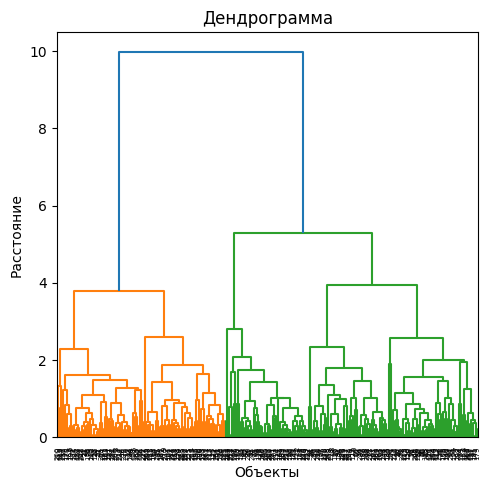

In [54]:
fig, axs = plt.subplots(1, 1, figsize=(5, 5))
# Правый субплот с дендрограммой
dendrogram(Z_average, ax=axs)
axs.set_title('Дендрограмма')
axs.set_xlabel('Объекты')
axs.set_ylabel('Расстояние')

plt.tight_layout()
plt.show()


### 3. Матрица расстояний (смежности) и матрица сходств

Расстояния между парами векторов из двух множеств $d\left(X_l, X_j\right)$ могут быть представлены в виде симметричной матрицы расстояний (матрица смежности):

$$
D=\left(\begin{array}{cccc}
0 & d_{12} & \ldots & d_{1 n} \\
d_{21} & 0 & \ldots & d_{2n} \\
\ldots & \ldots & \ldots & \ldots \\
d_{n 1} & d_{n 2} & \ldots & 0
\end{array}\right)
$$

Понятием, противоположным расстоянию, является понятие сходства между объектами. Неотрицательная вещественная функция $S\left(x_i , x_j\right)=S_{i j}$ называется __мерой сходства__, если:


1) $0 \leq S\left(x_i, x_j\right)<1$ для $x_i \neq x_j$

2) $S\left(x_i, x_i\right)=1$

3) $S\left(x_i, x_j\right)=S\left(x_j, x_i\right)$

Пары значений мер сходства можно объединить в __матрицу сходства__:

$$
S=\left(\begin{array}{cccc}
1 & s_{12} & \ldots & s_{1 n} \\
s_{21} & 1 & \ldots & s_{2 n} \\
s_{n 1} &  s_{n 2} & \ldots & 1
\end{array}\right)
$$

Величину $S_{i j}$ называют __коэффициентом сходства__.

Постройте матрицу смежности по датасету первой задачи, взяв в качестве меры расстояния евклидову метрику.

Постройте на основе неё какую-нибудь матрицу сходства (вам надо самим придумать функцию сходства - просто удовлетвроите трём свойствам).

Визуализируйте обе матрицы в виде картинки. Используйте imshow() или pcolormesh() из Matplotlib.

Для получения матриц используйте функцию  [sklearn.metrics.pairwise_distances ](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.pairwise_distances.html#sklearn.metrics.pairwise_distances) (тут можно в качестве метрики использовать свою собственную функцию - так можно сделать матрицу сходств) или какую-то другую отсюда https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics.pairwise

Можно также посмотреть здесь https://scikit-learn.org/stable/modules/classes.html#module-sklearn.neighbors , например, функцию neighbors.[kneighbors_graph](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.kneighbors_graph.html#sklearn.neighbors.kneighbors_graph) 


(300, 300)


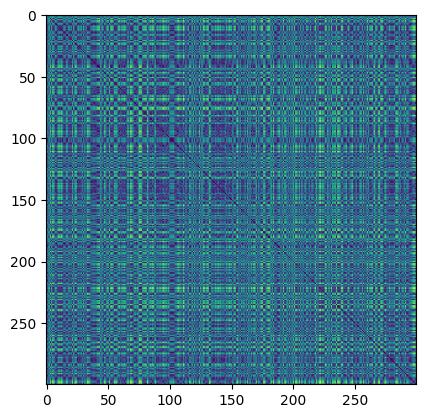

In [79]:
X, y = make_blobs(n_samples=300, centers=5, cluster_std=0.85, random_state=1)
dist = pairwise_distances(X)
print(dist.shape)

sim = np.zeros(dist.shape)
sim = 1 - abs(dist)/np.max(abs(dist))

plt.imshow(dist)



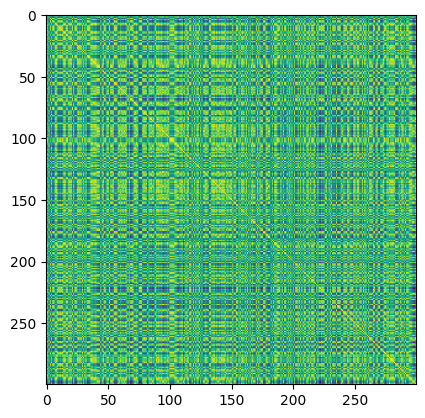

In [80]:
plt.imshow(sim)

### 4. Игрушечные галактики (Источник - Pelican :))

Следующий датасет содержит координаты в 3д некоторого набора галактик. Необходимо найти скопления этих самых галактик с помощью алгоритма `hdbscan` - смеси обычного dbscan и иерархического подхода. Точная формулировка задачи после кода.

Вам понадобится файл toy_galaxies.csv из гугл диска.
ка.

In [131]:
import csv

,x,y,z,label
0,-35.283431,-21.779673,-113.964124,1.0
1,-35.603636,-18.430420,-113.298009,1.0
2,-34.202934,-22.362906,-106.979709,1.0


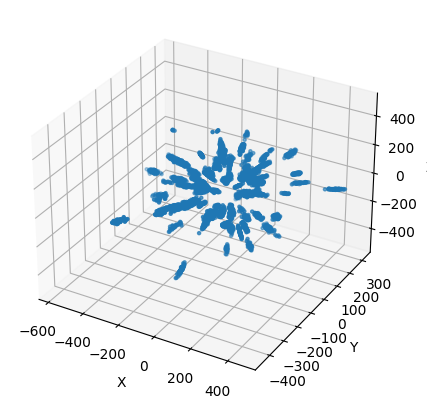

In [133]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

from sklearn.metrics import adjusted_rand_score as ari
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import MeanShift, AgglomerativeClustering


data = pd.read_csv("toy_galaxies.csv") # Не забудьте скачать файл
display(data.head(3))

# Отобразим датасет
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111, projection='3d')
Axes3D.scatter(ax, data.x,data.y,data.z, marker='.')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()

In [125]:
x = np.array(x)
x = np.transpose(x)
X = np.zeros((3,5515))
print(x)

<built-in method transpose of numpy.ndarray object at 0x0000028B4077E250>
